## Nama : Fikri Aziz S
### Exam Modul 2

### Untuk push github

git init
git add .
git commit -m "Exam-2"
git remote add origin https://github.com/fikriash/Exam_2_JCDS.git
git push -u origin master

## Kegunaan Jenis Grafik
#### Grafik line (plt.plot) --> untuk time series
#### Bar plot (plt.bar, plt.hist, sns.barplot, sns.boxplot, sns.countplot) --> Comparison misal antar gender
#### Scatter Plot (plt.scatter) --> Korelasi
#### Pie Plot (plt.pie) --> untuk komposisi
#### Boxplot (plt.boxplot, sns.boxplot, sns.swarmplot, sns.violinplot, sns.stripplot) --> persebaran data

### Variabel

- Unnamed : nomer produk per category
- Category : Kelompok produk
- Original Price : Harga produk sebelum didiskon
- perc_of_unit_sold : Persentase penjualan produk
- Shipping rate : tingkat pengiriman produk
- gender : jenis kelamin pembeli


## Latar Belakang Masalah

###### Terdapat banyak sekali produk dan category product yang persentase terjual nya masih dibawah rata-rata
###### Banyak pemebelian produk yang tidak memberikan rating terhadap produk yang terjual
###### Terdapat column unnamed yang tidak jelas keterangan nya (akan tetapi menurut saya ini merupakan nomer produk per category
###### Tidak terdapat nya data Quantity setiap produk yang terjual

## Tujuan EDA

###### Meningkatkan persentase penjualan product terutama untuk produk dengan persentase penjualan di bawah rata-rata per category
###### Menganalisa hubungan antara persentase penjualan produk dengan original price dan price per category

# Import Package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set_style('whitegrid') # memutihkan grid
pd.set_option('display.max_columns', None) # mengatur jumlah output yg akan dikeluarkan
pd.set_option('display.max_rows', 1000)

# Import Data

In [186]:
dfo = pd.read_csv('ecommerce.csv')
dfo.head(5)
dfs = dfo # Data sintetis

In [6]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         609 non-null    int64  
 1   category           609 non-null    object 
 2   product            609 non-null    object 
 3   Original_price     583 non-null    float64
 4   price              609 non-null    float64
 5   perc_of_unit_sold  522 non-null    float64
 6   rating             427 non-null    float64
 7   shpping_rate       567 non-null    object 
 8   gender             581 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 42.9+ KB


# Cek Missing Value

In [7]:
dfs.isnull().sum()

Unnamed: 0             0
category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

In [ ]:
dfs.head(21)

- Terdapat 609 data penjualan

# Handling Missing Value

In [31]:
# persentase nan Original Price
26 / 609 * 100

4.269293924466338

In [194]:
# persentase Nan perc_of unit sold
87 / 609 * 100

14.285714285714285

In [209]:
# persentase nan shipping rate
42/609*100

6.896551724137931

In [210]:
# persentase nan gender
28/609*100

4.597701149425287

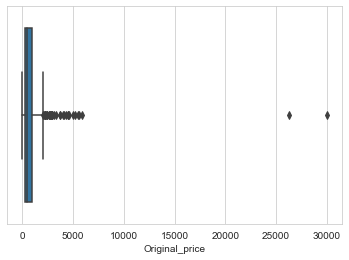

In [73]:
sns.boxplot(x=dfs['Original_price'])

##### Ada outliers, maka dari itu digunakan nilai median untuk menghandle nan Original_price

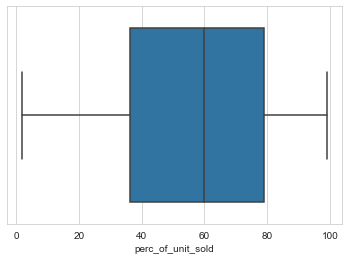

In [195]:
sns.boxplot(x=dfs['perc_of_unit_sold'])

##### Tidak ada outliers, maka dari itu digunakan nilai mean untuk menghandle nan perc_of_unit_sold

In [214]:
dfs['shpping_rate'].mode()

0    FREE Shipping
dtype: object

In [215]:
dfs['gender'].mode()

0    men
dtype: object

##### Untuk handling nan shipping rate dan gender digunakan modus, karena dalam data set tersebut yang paling banyakk berbelanja ialah men, dan shipping rate ialah Free Shipping

In [118]:
dfs1 = dfs.groupby(['category'])['Original_price'].median()
dfs1

category
Athletic Shoes            339.0
Casual & Dress Shoes      469.0
Eyewear                   820.0
Perfumes & Fragrances     273.0
Sportswear                140.0
Wallets                   195.0
Watches                  1125.0
Name: Original_price, dtype: float64

In [200]:
dfs2 = dfs.groupby(['category'])['perc_of_unit_sold'].mean()
dfs2

category
Athletic Shoes           63.048780
Casual & Dress Shoes     52.028571
Eyewear                  48.307692
Perfumes & Fragrances    73.793651
Sportswear               51.142857
Wallets                  43.942857
Watches                  61.865772
Name: perc_of_unit_sold, dtype: float64

In [219]:
a = dfs['gender'].mode().iloc[0]
b = dfs['shpping_rate'].mode().iloc[0]

In [ ]:
dfs.sort_values(by=['Original_price']).tail(27)

In [191]:
dfw= dfs[dfs['category']=='Watches']
dfA= dfs[dfs['category']=='Athletic Shoes']
dfp= dfs[dfs['category']=='Perfumes & Fragrances']
dfS= dfs[dfs['category']=='Sportswear']
dfC = dfs[dfs['category']=='Casual & Dress Shoes']
dfE = dfs[dfs['category']=='Eyewear']
dfWal= dfs[dfs['category']=='Wallets']

In [ ]:
dfw['Original_price'] = dfw['Original_price'].fillna(dfs1['Watches'])
dfw['perc_of_unit_sold'] = dfw['perc_of_unit_sold'].fillna(dfs2['Watches'])
dfA['Original_price'] = dfA['Original_price'].fillna(dfs1['Athletic Shoes'])
dfA['perc_of_unit_sold'] = dfA['perc_of_unit_sold'].fillna(dfs2['Athletic Shoes'])
dfp['Original_price'] = dfp['Original_price'].fillna(dfs1['Perfumes & Fragrances'])
dfp['perc_of_unit_sold'] = dfp['perc_of_unit_sold'].fillna(dfs2['Perfumes & Fragrances'])
dfS['Original_price'] = dfS['Original_price'].fillna(dfs1['Sportswear'])
dfS['perc_of_unit_sold'] = dfS['perc_of_unit_sold'].fillna(dfs2['Sportswear'])
dfC['perc_of_unit_sold'] = dfC['perc_of_unit_sold'].fillna(dfs2['Casual & Dress Shoes'])
dfE['perc_of_unit_sold'] = dfE['perc_of_unit_sold'].fillna(dfs2['Eyewear'])
dfWal['perc_of_unit_sold'] = dfWal['perc_of_unit_sold'].fillna(dfs2['Wallets'])
dfw

In [227]:
dff = pd.concat([dfw,dfA,dfp,dfS,dfC,dfE,dfWal])
dff['shpping_rate'] = dff['shpping_rate'].fillna(b)
dff['gender'] = dff['shpping_rate'].fillna(a)
dfix = dff.drop('rating', 1)
dfix.isnull().sum()

Unnamed: 0           0
category             0
product              0
Original_price       0
price                0
perc_of_unit_sold    0
shpping_rate         0
gender               0
dtype: int64

# EDA

In [228]:
dfix.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,609.0,60.072250,47.287663,0.0,21.00,46.00,92.00,179.0
Original_price,609.0,860.552381,1766.570539,42.0,279.00,500.00,997.00,29970.0
price,609.0,339.434039,285.416406,21.4,140.98,262.49,444.99,3220.0
perc_of_unit_sold,609.0,57.426602,23.682911,2.0,42.00,60.00,75.00,99.0


Text(0.5, 1.0, 'Heatmap Graph of Dataset')

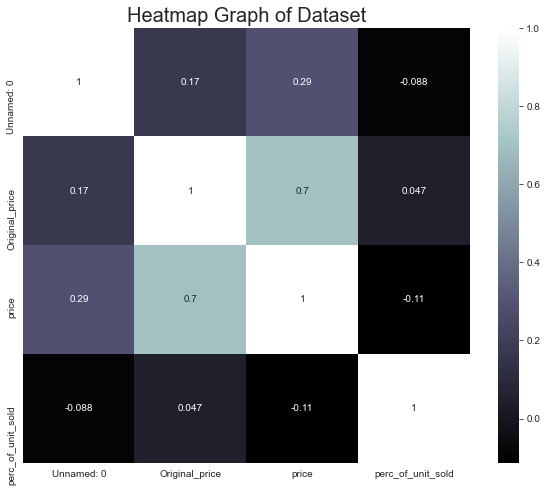

In [229]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfix.corr(), cmap='bone', annot=True)
plt.title('Heatmap Graph of Dataset', fontsize=20)

#### Korelasi kuat terjadi antara price dengan original price
#### Tidak ada hubungan yang cukup kuat antara original price dengan persentase penjualan

#### Terbukti berdasarkan heatmap, korelasi antara original price dg persentase penjualan hanya 0.047

In [231]:
dfix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 429 to 428
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         609 non-null    int64  
 1   category           609 non-null    object 
 2   product            609 non-null    object 
 3   Original_price     609 non-null    float64
 4   price              609 non-null    float64
 5   perc_of_unit_sold  609 non-null    float64
 6   shpping_rate       609 non-null    object 
 7   gender             609 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 42.8+ KB


===================================================================================================

In [233]:
dfix['category'].unique()

array(['Watches', 'Athletic Shoes', 'Perfumes & Fragrances', 'Sportswear',
       'Casual & Dress Shoes', 'Eyewear', 'Wallets'], dtype=object)

## Melihat Category produk yang persentase penjualan nya dibawah rata2 = 56.30 %

In [276]:
dfs2.mean()

56.304311587930606

In [ ]:
new_index = list(np.arange(1,610))
dfix['new_index'] = new_index
dfix = dfix.set_index('new_index')
dfix

In [274]:
dfcategory = dfix.groupby('category')
dfgender = dfix.groupby('gender')
dfshipping = dfix.groupby('shpping_rate')

In [277]:
m = dfcategory.mean().sort_values(by='perc_of_unit_sold')
m

,Unnamed: 0,Original_price,price,perc_of_unit_sold
category,,,,
Wallets,18.0,294.324324,151.856486,43.942857
Eyewear,76.5,797.995455,370.994026,48.307692
Sportswear,16.0,172.696970,99.590000,51.142857
Casual & Dress Shoes,23.0,451.276596,279.379149,52.028571
Watches,89.5,1725.528333,541.343722,61.865772
Athletic Shoes,47.0,378.431579,256.004947,63.048780
Perfumes & Fragrances,31.0,267.301587,91.808413,73.793651


##### Urutan kategory produk dengan persentase penjualan rendah - tinggi: Wallets, Eyewear, Sportswear, Casual & Dress Shoes, Watches, Athletic Shoes, Perfumes & Fragrances

## Kesimpulan analisis

### 1. Harus dilakukan peningkatan penjulan untuk kategory Wallets, Eyewear, Sportwear dan Casual Dress Shoes dengan cara memberikan promo bundling dengan category produk yang tinggi persentase penjualan
- Wallets dengan Watches
- Eyewear, Sportwear dengan Athtletic Shoes
- Casual dress dengan Perfume

### 2. Original price dan Price tidak terlalu berpengaruh terhadap Persentase penjualan